Preprocess data and training model

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [70]:
data = pd.read_csv(r'C:\Users\pieta\OneDrive\Bureau\Mental Health Model\Mental_health_model\Data\data_clean_pre_encode.csv')

In [71]:
data.columns
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Satisfaction_with_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')


In [72]:
from sklearn.preprocessing import OneHotEncoder


# Instantiate the label encoder
# Function to one-hot encode categorical columns and save encoders
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")
ohe_transform = ohe.fit_transform(data[['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level',
       'Access_to_Mental_Health_Resources',
       'Productivity_Change', 'Satisfaction_with_Remote_Work',
       'Physical_Activity', 'Sleep_Quality', 'Region']])

data_encoded = pd.concat([data, ohe_transform], axis=1).drop(columns=['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level',
       'Access_to_Mental_Health_Resources',
       'Productivity_Change', 'Satisfaction_with_Remote_Work',
       'Physical_Activity', 'Sleep_Quality', 'Region'])


# save the encoder

with open('Model_training_encoder.pkl', 'wb') as file:
    pickle.dump(ohe, file)




In [73]:

'''# Assuming 'data' is your DataFrame containing the features
scaler = StandardScaler()

# Scale the data
data_scaled = scaler.fit_transform(data_encoded)

# Convert the scaled data_encoded back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data_encoded.columns)

# Save the scaler to a pickle file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Check the first few rows of the scaled data_encoded
data_scaled.head()'''


"# Assuming 'data' is your DataFrame containing the features\nscaler = StandardScaler()\n\n# Scale the data\ndata_scaled = scaler.fit_transform(data_encoded)\n\n# Convert the scaled data_encoded back to a DataFrame\ndata_scaled = pd.DataFrame(data_scaled, columns=data_encoded.columns)\n\n# Save the scaler to a pickle file\nwith open('scaler.pkl', 'wb') as f:\n    pickle.dump(scaler, f)\n\n# Check the first few rows of the scaled data_encoded\ndata_scaled.head()"

In [74]:
# Separate features (X) and target (y)
X = data_encoded.drop('Mental_Health_Condition', axis=1)
y = data_encoded['Mental_Health_Condition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
X

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work,Gender_Female,Gender_Male,Gender_Non-binary,...,Physical_Activity_Weekly,Sleep_Quality_Average,Sleep_Quality_Good,Sleep_Quality_Poor,Region_Africa,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,32,13,47,7,2,1,1,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,40,3,52,4,1,3,2,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,59,22,46,11,5,4,5,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,27,20,32,8,4,3,3,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,49,32,35,12,2,3,3,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,4,24,2,5,4,1,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4996,39,27,48,15,1,1,1,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4997,42,21,34,1,4,3,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4998,27,26,58,0,5,3,4,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [76]:

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42)
}


# Evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[model_name] = acc
    print(f"{model_name}: Accuracy = {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression: Accuracy = 0.5010
              precision    recall  f1-score   support

           0       0.52      0.53      0.52       521
           1       0.48      0.47      0.48       479

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000

KNN: Accuracy = 0.4870
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       521
           1       0.46      0.46      0.46       479

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000

SVM: Accuracy = 0.4900
              precision    recall  f1-score   support

           0       0.51      0.37      0.43       521
           1       0.48      0.62      0.54       479

    accuracy                           0.49      1000
   macro avg       0.49      0.50      0.48

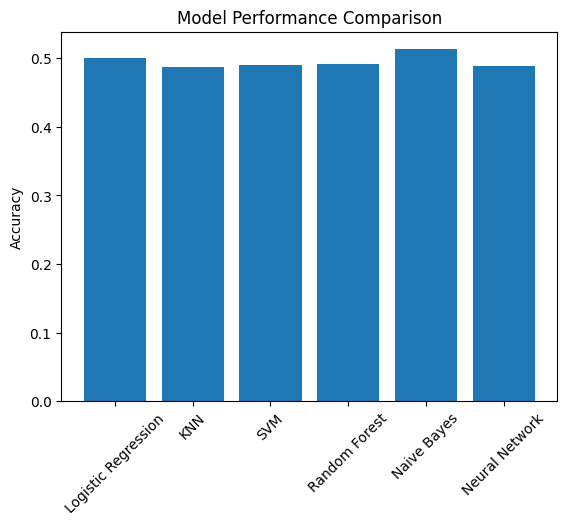

In [77]:
import matplotlib.pyplot as plt

# Plot results
plt.bar(results.keys(), results.values())
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()


In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define models and their hyperparameter grids
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

param_grids = {
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    'KNN': {'n_neighbors': [3, 5, 7], 'metric': ['minkowski', 'euclidean']},
    'Naive Bayes': {},  # No hyperparameters for Naive Bayes
    'Neural Network': {'hidden_layer_sizes': [(50,), (100,), (100, 100)], 'activation': ['relu', 'tanh']}
}

# Store the best models and results
best_models = {}
results = {}

# Loop over the models
for model_name, model in models.items():
    print(f"Performing GridSearch for {model_name}")
    
    # Define the GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    
    # Fit GridSearchCV to the training data
    grid_search.fit(X_train, y_train)
    
    # Save the best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Store results
    results[model_name] = grid_search.best_score_
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")
    print('-' * 50)

# Compare models based on results
for model_name, accuracy in results.items():
    print(f"{model_name}: Best Accuracy = {accuracy:.4f}")


Performing GridSearch for Random Forest
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.5075
--------------------------------------------------
Performing GridSearch for SVM
Best parameters for SVM: {'C': 10, 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.49624999999999997
--------------------------------------------------
Performing GridSearch for Logistic Regression
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.49350000000000005
--------------------------------------------------
Performing GridSearch for KNN
Best parameters for KNN: {'metric': 'minkowski', 'n_neighbors': 5}
Best Cross-Validation Accuracy: 0.50275
--------------------------------------------------
Performing GridSearch for Naive Bayes
Best parameters for Naive Bayes: {}
Best Cross-Validation Accuracy: 0.506
--------------------------------------------------
Performing Gr

In [80]:
# Test the best models
for model_name, model in best_models.items():
    print(f"Testing {model_name} on the Test Set")
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print('-' * 50)


Testing Random Forest on the Test Set
Random Forest Test Accuracy: 0.4910
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       521
           1       0.47      0.47      0.47       479

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000

--------------------------------------------------
Testing SVM on the Test Set
SVM Test Accuracy: 0.5240
              precision    recall  f1-score   support

           0       0.54      0.61      0.57       521
           1       0.50      0.43      0.47       479

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000

--------------------------------------------------
Testing Logistic Regression on the Test Set
Logistic Regression Test Accuracy: 0.4990
              precision    rec

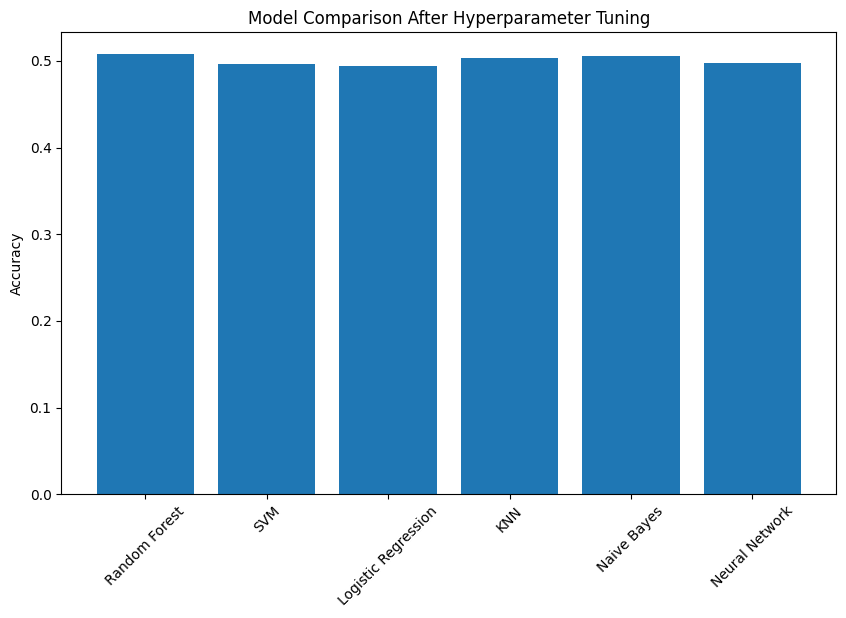

In [81]:
import matplotlib.pyplot as plt

# Plot model comparison based on best accuracy
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Comparison After Hyperparameter Tuning")
plt.show()


In [82]:
from sklearn.model_selection import cross_val_score

# Compare models based on cross-validation scores
cv_scores = {}

for model_name, model in best_models.items():
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    cv_scores[model_name] = cv_score
    print(f"{model_name}: CV Score = {cv_score:.4f}")

# Select model with the highest CV score
best_cv_model_name = max(cv_scores, key=cv_scores.get)
best_cv_model = best_models[best_cv_model_name]
print(f"Best Model based on Cross-Validation: {best_cv_model_name}")


Random Forest: CV Score = 0.5033
SVM: CV Score = 0.4962
Logistic Regression: CV Score = 0.4935
KNN: CV Score = 0.5005
Naive Bayes: CV Score = 0.5060
Neural Network: CV Score = 0.4790
Best Model based on Cross-Validation: Naive Bayes


In [83]:
import pickle

# Find the first best model based on accuracy
best_cv_model_name = max(results, key=results.get)  # Get the model name with highest accuracy
best_model = best_models[best_cv_model_name]  # Get the model object

# Save the best model to a .pkl file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Confirm saving
print(f"Best model ({best_cv_model_name}) saved as 'best_model.pkl'")


Best model (Random Forest) saved as 'best_model.pkl'


Once your model is trained, you can use it for various purposes such as predictions, deployments, or integration into applications. Here are a few common ways to use a trained model:

### **1. Making Predictions**
You can use the trained model to make predictions on new, unseen data. This is typically done in the following steps:

#### **Example of Making Predictions:**

```python
# Assuming the model is saved in 'best_model.pkl'
import pickle

# Load the trained model from the .pkl file
with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)

# New data for prediction (ensure it’s preprocessed and scaled if needed)
new_data = [[30, 1, 3, 5, 7]]  # Example new data (e.g., [Age, Gender, Experience, Hours Worked, Meetings])
new_data_scaled = scaler.transform(new_data)  # If you've used a scaler before

# Use the model to make predictions
predictions = model.predict(new_data_scaled)

# Display the prediction
print("Prediction:", predictions)
```

### **2. Deploying the Model**
You can deploy your model so that it can be used by others or accessed remotely. Here are a few common deployment methods:

#### **a. Flask (for Web Deployment)**
You can create a REST API using **Flask** that serves your model. This allows others to make predictions by sending HTTP requests to your API.

##### **Example Flask API:**

1. Install Flask:
   ```bash
   pip install flask
   ```

2. Create a Flask app to serve the model:
   
   ```python
   from flask import Flask, request, jsonify
   import pickle
   import numpy as np
   from sklearn.preprocessing import StandardScaler
   
   app = Flask(__name__)

   # Load the trained model and scaler
   with open('best_model.pkl', 'rb') as f:
       model = pickle.load(f)
   with open('scaler.pkl', 'rb') as f:
       scaler = pickle.load(f)

   @app.route('/predict', methods=['POST'])
   def predict():
       # Get input data from the request
       data = request.get_json()
       new_data = np.array(data['features']).reshape(1, -1)

       # Scale the input data
       new_data_scaled = scaler.transform(new_data)

       # Make a prediction
       prediction = model.predict(new_data_scaled)

       # Return the prediction as a JSON response
       return jsonify({'prediction': prediction.tolist()})

   if __name__ == '__main__':
       app.run(debug=True)
   ```

3. **Run the Flask App**:
   ```bash
   python app.py
   ```

   Now your model can be accessed by sending a `POST` request to `http://localhost:5000/predict` with the input data in JSON format.

#### **b. Deploying with Cloud Services (e.g., AWS, Azure, GCP)**
If you want to deploy your model in the cloud, you can use services like:
- **AWS SageMaker**
- **Azure Machine Learning**
- **Google Cloud AI Platform**

These platforms allow you to easily deploy, manage, and scale machine learning models.

### **3. Integrating into Applications**
Once deployed as an API or cloud service, you can integrate the model into different types of applications:
- **Web Applications**: Use the model through the API in web apps built with frameworks like Django, Flask, or FastAPI.
- **Mobile Applications**: Use the model in Android or iOS apps through API calls.
- **Desktop Applications**: Integrate the model with desktop software for prediction-based tasks (e.g., using PyQt or Tkinter in Python).

### **4. Batch Predictions (Offline Use)**
If you need to make predictions on large datasets or periodically, you can run the model in batch mode. For example, use the trained model to make predictions for a list of customer data or financial transactions.

```python
# Assuming the model and data are loaded
data_for_batch = pd.read_csv('new_data.csv')  # New data for batch prediction
data_scaled = scaler.transform(data_for_batch)  # Preprocess if needed

# Make predictions for the entire dataset
batch_predictions = model.predict(data_scaled)

# Save the predictions to a file
data_for_batch['Predictions'] = batch_predictions
data_for_batch.to_csv('predictions.csv', index=False)
```

### **5. Model Evaluation**
After using your model for predictions, it's important to evaluate its performance regularly. You can test the model on fresh data (in case your environment or data distribution changes over time) and retrain it periodically.

```python
# Evaluate the model on new test data
new_data_test = pd.read_csv('new_test_data.csv')
X_test = new_data_test.drop(columns=['Target'])
y_test = new_data_test['Target']

X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
```

### **6. Monitor Model Drift**
In production, it’s important to monitor model performance over time to detect **model drift** (when the model's predictions become less accurate due to changes in data patterns). You can set up a monitoring system that alerts you when performance drops below a certain threshold, prompting you to retrain the model with new data.

---

### **Summary of Ways to Use a Trained Model**
1. **Make Predictions**: Directly use the model on new data.
2. **Deploy the Model**: Serve the model as a REST API using Flask or deploy it on cloud platforms.
3. **Integrate into Applications**: Integrate the model into web, mobile, or desktop applications.
4. **Batch Predictions**: Use the model for bulk predictions on datasets.
5. **Model Evaluation**: Evaluate the model regularly on new data.
6. **Monitor Model Drift**: Set up monitoring for model performance over time.

Each use case depends on the requirements of your project, such as whether the model is for real-time predictions or batch processing. Let me know if you need help with any of these steps!